## Data Manipulation

In this notebook we will review the concepts that someone woorking with data should be comfortable with:

* Files and Data Importing
* Pandas Library
* Numpy Library
* Data Visualization

### Files and Data Importing

Usually, the data that we want to anlyse is stored in different formats. In this case, we are going to review the ones I consider more relevant for data jobs.

1. **Comma-Separated-Value Files (`.csv`)**

A `CSV` file is a plain text file that stores data in rows, with each value separated by a comma. It’s widely used for simple, tabular data storage.

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
data_csv = pd.read_csv("data.csv")

2. **Excel Files (`.xlsx` or `.xls`)**

An `Excel` file is a spreadsheet file format created by Microsoft. It supports multiple sheets, formulas, and various data types, often used for structured data and reports.

In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
data_excel = pd.read_excel("data.xlsx", sheet_name="Sheet1")

3. **JSON Files (`.json`)**

A `JSON` file is a lightweight data format often used for data exchange, especially with web APIs. It stores data in a nested, human-readable structure of key-value pairs. It is like the `dict` data type in Python.

In [ ]:
import pandas as pd

# Load the JSON file into a DataFrame
data_json = pd.read_json("data.json")

4. **Parquet Files (`.parquet`)**

`Parquet` is a columnar storage file format optimized for large datasets. It’s efficient for reading and writing large files and is commonly used in big data processing.

In [ ]:
import pandas as pd

# Load the Parquet file into a DataFrame
data_parquet = pd.read_parquet("data.parquet")

### Pandas Library

`pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language. In this section we are going to cover some topics from the Pandas [CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf), but you can visit the official [documentation](https://pandas.pydata.org/docs/) for more details.

In [2]:
import pandas as pd

#### Creating DataFrames

To understand `DataFrames`, imagiene them as Excel table with rows and columns. Variables are stored in columns while observations are stored in rows.

To create a `DataFrame` we can use the `.DataFrame()` method to insert a dictionary with the data. The `keys` represent the columns, while the `values` (in a list format) are all the observations for that vairable.

In [10]:
customers_df = pd.DataFrame(
    {
        'customer_id': [1, 2, 3, 4, 5],
        'customer_name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com', 'eve@example.com']
    }
)

sales_df = pd.DataFrame(
    {
        'sales_id': [101, 102, 103, 104, 105],
        'customer_id': [1, 2, 3, 4, 5],  # Foreign Key to customer_id
        'product': ['Laptop', 'Phone', 'Tablet', 'Laptop', 'Phone'],
        'sale_amount': [1200, 800, 500, 1300, 750],
        'sale_date': ['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05']
    }
)


print("==== Customers DataFrame ====\n")
print(customers_df)
print("\n==== Sales DataFrame ====\n")
print(sales_df)

==== Customers DataFrame ====

   customer_id customer_name                email
0            1         Alice    alice@example.com
1            2           Bob      bob@example.com
2            3       Charlie  charlie@example.com
3            4         David    david@example.com
4            5           Eve      eve@example.com

==== Sales DataFrame ====

   sales_id  customer_id product  sale_amount   sale_date
0       101            1  Laptop         1200  2024-10-01
1       102            2   Phone          800  2024-10-02
2       103            3  Tablet          500  2024-10-03
3       104            4  Laptop         1300  2024-10-04
4       105            5   Phone          750  2024-10-05


#### Reshaping Data

Data can reshaped in different ways. In this subsection we are going to cover to most relevant ones.

1. **`melt` and `pivot`**.
    * `melt`: Gather columns into rows.
    * `pivot`: Spread rows into columns.

In [ ]:
pd.melt(customers_df, id_vars="customer_id")

,customer_id,variable,value
0,1,customer_name,Alice
1,2,customer_name,Bob
2,3,customer_name,Charlie
3,4,customer_name,David
4,5,customer_name,Eve
5,1,email,alice@example.com
6,2,email,bob@example.com
7,3,email,charlie@example.com
8,4,email,david@example.com
9,5,email,eve@example.com


In [ ]:
pd.pivot(sales_df, index="customer_id", columns="product").reset_index() # yopu might need to play with these to avoid multiple levels of columns

customer_id sales_id               sale_amount                \
product               Laptop  Phone Tablet      Laptop  Phone Tablet   
0                 1    101.0    NaN    NaN      1200.0    NaN    NaN   
1                 2      NaN  102.0    NaN         NaN  800.0    NaN   
2                 3      NaN    NaN  103.0         NaN    NaN  500.0   
3                 4    104.0    NaN    NaN      1300.0    NaN    NaN   
4                 5      NaN  105.0    NaN         NaN  750.0    NaN   

          sale_date                          
product      Laptop       Phone      Tablet  
0        2024-10-01         NaN         NaN  
1               NaN  2024-10-02         NaN  
2               NaN         NaN  2024-10-03  
3        2024-10-04         NaN         NaN  
4               NaN  2024-10-05         NaN

2. **`concat`** Append rows or columns of DataFrames. Note that the dataframes that we want to append are within a list object.

In [17]:
# Append rows
pd.concat([customers_df, customers_df])

,customer_id,customer_name,email
0,1,Alice,alice@example.com
1,2,Bob,bob@example.com
2,3,Charlie,charlie@example.com
3,4,David,david@example.com
4,5,Eve,eve@example.com
0,1,Alice,alice@example.com
1,2,Bob,bob@example.com
2,3,Charlie,charlie@example.com
3,4,David,david@example.com
4,5,Eve,eve@example.com


In [ ]:
# Append columns
pd.concat([customers_df, sales_df], axis=1)

,customer_id,customer_name,email,sales_id,customer_id,product,sale_amount,sale_date
0,1,Alice,alice@example.com,101,1,Laptop,1200,2024-10-01
1,2,Bob,bob@example.com,102,2,Phone,800,2024-10-02
2,3,Charlie,charlie@example.com,103,3,Tablet,500,2024-10-03
3,4,David,david@example.com,104,4,Laptop,1300,2024-10-04
4,5,Eve,eve@example.com,105,5,Phone,750,2024-10-05


3. **Others**
    * Sort: it is necessary to add the column on which we want to sort by.
    * Rename: it is necessary to define a dictionary with the current column name and the new column name
    * Drop columns: it is necessary to indicate the columns we want to remove

In [20]:
customers_df.sort_values("customer_name", ascending=False)

,customer_id,customer_name,email
4,5,Eve,eve@example.com
3,4,David,david@example.com
2,3,Charlie,charlie@example.com
1,2,Bob,bob@example.com
0,1,Alice,alice@example.com


In [21]:
customers_df.rename(columns={"customer_id": "id"})

,id,customer_name,email
0,1,Alice,alice@example.com
1,2,Bob,bob@example.com
2,3,Charlie,charlie@example.com
3,4,David,david@example.com
4,5,Eve,eve@example.com


In [22]:
customers_df.drop(columns=["customer_name"])

,customer_id,email
0,1,alice@example.com
1,2,bob@example.com
2,3,charlie@example.com
3,4,david@example.com
4,5,eve@example.com


#### Subset Observations

Subsetting observations (rows) and subsetting variables (columns) are important because they allow you to filter and focus on specific parts of your data. Whether you're interested in a particular set of rows or a subset of columns, this functionality helps you extract relevant information and work more efficiently with your data.

1. **Subseting rows (Observations)**
Suppose we want to see only the sales where the amount is greater than 1000. We can do it applying the condition to the dataframe, note this is done inside the square brackets (`[]`).

In [54]:
sales_df[sales_df["sale_amount"] > 1000]

,sales_id,customer_id,product,sale_amount,sale_date
0,101,1,Laptop,1200,2024-10-01
3,104,4,Laptop,1300,2024-10-04


2. **Subseting columns (Variables)**

Subsetting columns means selecting specific variables (or attributes) from your dataset. Sometimes, you only need a few columns for your analysis and not the entire dataset. In this case we specify the columns within the square brackets (`[]`).

In [55]:
sales_df[['sales_id', 'sale_amount']]

,sales_id,sale_amount
0,101,1200
1,102,800
2,103,500
3,104,1300
4,105,750


Note that we can do both subsetings at the same time:

In [56]:
sales_df[sales_df["sale_amount"] > 1000][['sales_id', 'sale_amount']]

,sales_id,sale_amount
0,101,1200
3,104,1300


#### Summarize Data

`pandas` provides a large set of summary functions that operate on different kinds of pandas objects (DataFrame columns, Series, GroupBy, Expanding and Rolling (see below)) and produce single values for each of the groups. This can be applied to an entire dataset or only a column.

In [ ]:
# Apply to a whole dataset
sales_df.describe()

,sales_id,customer_id,sale_amount
count,5.000000,5.000000,5.000000
mean,103.000000,3.000000,910.000000
std,1.581139,1.581139,332.415403
min,101.000000,1.000000,500.000000
25%,102.000000,2.000000,750.000000
50%,103.000000,3.000000,800.000000
75%,104.000000,4.000000,1200.000000
max,105.000000,5.000000,1300.000000


In [ ]:
print(sales_df["product"].unique()) # unique products
print(sales_df["product"].nunique()) # number of unique products

['Laptop' 'Phone' 'Tablet']
3


Check the documentation and the cheatsheet for all available functions to summarize the data.
Note that these functions can be applied in combination with a `groupby`.

#### Make New Columns

Columns can be created with defined values (constant, array of values), or we can calculate a new column based on other columns from the dataframe.

In [25]:
# Copy of the customers dataframe to avoid modifying it
df = customers_df.copy()
df["constant"] = 1
df

,customer_id,customer_name,email,constant
0,1,Alice,alice@example.com,1
1,2,Bob,bob@example.com,1
2,3,Charlie,charlie@example.com,1
3,4,David,david@example.com,1
4,5,Eve,eve@example.com,1


In [26]:
df["combined_column"] = df["customer_id"] + df["constant"]
df

,customer_id,customer_name,email,constant,combined_column
0,1,Alice,alice@example.com,1,2
1,2,Bob,bob@example.com,1,3
2,3,Charlie,charlie@example.com,1,4
3,4,David,david@example.com,1,5
4,5,Eve,eve@example.com,1,6


It is possible to calculate a new column only for the observations that satisfy a condition.

In [27]:
df.loc[df["customer_id"] > 3, "status"] = "out of top 3"
df

,customer_id,customer_name,email,constant,combined_column,status
0,1,Alice,alice@example.com,1,2,NaN
1,2,Bob,bob@example.com,1,3,NaN
2,3,Charlie,charlie@example.com,1,4,NaN
3,4,David,david@example.com,1,5,out of top 3
4,5,Eve,eve@example.com,1,6,out of top 3


#### Handling Missing Data

Sometimes data can be incomplete, so we can fill it or remove it from the dataset. Let's see this in action using the examples from the previous section.

In [ ]:
# Drops observations with missing data. But we could use the subset parameter to specify which columns cannot be empty
df.dropna(subset="status")

,customer_id,customer_name,email,constant,combined_column,status
3,4,David,david@example.com,1,5,out of top 3
4,5,Eve,eve@example.com,1,6,out of top 3


In [ ]:
# Fill all missing values from the dataset.
df.fillna("Unknown")

,customer_id,customer_name,email,constant,combined_column,status
0,1,Alice,alice@example.com,1,2,Unknown
1,2,Bob,bob@example.com,1,3,Unknown
2,3,Charlie,charlie@example.com,1,4,Unknown
3,4,David,david@example.com,1,5,out of top 3
4,5,Eve,eve@example.com,1,6,out of top 3


In [48]:
# Fill missing values from a specified column.
df["status"].fillna("Unknown")

0         Unknown
1         Unknown
2         Unknown
3    out of top 3
4    out of top 3
Name: status, dtype: object

#### Combine Datasets

The `merge` functions in pandas are important because they allow us to combine different datasets based on common information, just like how you would join information from different tables in a database.

Note that there different types of merges depending on the way we want to combine the data:
* **Inner Merge:** Only keeps the rows where both datasets have matching values for the merge column(s).
* **Left Merge:** Keeps all rows from the left dataset and matches data from the right dataset where possible (fills with NaN if there's no match).
* **Right Merge:** Keeps all rows from the right dataset and matches data from the left dataset where possible. (not very used)
* **Outer Merge:** Combines all rows from both datasets, filling missing values where there are no matches.

Let's see this in action. Note that for these examples we are taking only a subset of the data sets using `.head()` and `.tail()`. 

In [41]:
print(sales_df.tail(3))
print(customers_df.head(3))

   sales_id  customer_id product  sale_amount   sale_date
2       103            3  Tablet          500  2024-10-03
3       104            4  Laptop         1300  2024-10-04
4       105            5   Phone          750  2024-10-05
   customer_id customer_name                email
0            1         Alice    alice@example.com
1            2           Bob      bob@example.com
2            3       Charlie  charlie@example.com


In [42]:
pd.merge(
    sales_df.tail(3),
    customers_df.head(3),
    how="inner",
    on="customer_id"
)

,sales_id,customer_id,product,sale_amount,sale_date,customer_name,email
0,103,3,Tablet,500,2024-10-03,Charlie,charlie@example.com


In [43]:
pd.merge(
    sales_df.tail(3),
    customers_df.head(3),
    how="left",
    on="customer_id"
)

,sales_id,customer_id,product,sale_amount,sale_date,customer_name,email
0,103,3,Tablet,500,2024-10-03,Charlie,charlie@example.com
1,104,4,Laptop,1300,2024-10-04,NaN,NaN
2,105,5,Phone,750,2024-10-05,NaN,NaN


In [44]:
pd.merge(
    sales_df.tail(3),
    customers_df.head(3),
    how="outer",
    on="customer_id"
)

,sales_id,customer_id,product,sale_amount,sale_date,customer_name,email
0,103.0,3,Tablet,500.0,2024-10-03,Charlie,charlie@example.com
1,104.0,4,Laptop,1300.0,2024-10-04,NaN,NaN
2,105.0,5,Phone,750.0,2024-10-05,NaN,NaN
3,NaN,1,NaN,NaN,NaN,Alice,alice@example.com
4,NaN,2,NaN,NaN,NaN,Bob,bob@example.com


#### Group Data

Grouping data can be one of the most important concepts when working with pandas since usually we need to aggregate our data in order to get insights. For example, total sold by product.

To group the data, we use the `.groupby()` method, where it's necessary to define the variables on which we want to group the data. Then, another method must be defined to specify the aggregation type.

In [36]:
print(sales_df.groupby("product")["sales_id"].count().reset_index()) # no column to aggregate is required

  product  sales_id
0  Laptop         2
1   Phone         2
2  Tablet         1


In [37]:
print(sales_df.groupby("product").sum("sale_amount")) # column to aggregate is required
print(sales_df.groupby("product").sum("sale_amount").reset_index()) # column to aggregate is required

         sales_id  customer_id  sale_amount
product                                    
Laptop        205            5         2500
Phone         207            7         1550
Tablet        103            3          500
  product  sales_id  customer_id  sale_amount
0  Laptop       205            5         2500
1   Phone       207            7         1550
2  Tablet       103            3          500


Note that we are using the `.reset_index()` method to include the variable on which we group by in a column instead of the index of the pandas dataframe. Addtionally, there multiple aggregation functions that can be checked in the documentation or the cheatsheet.

### Numpy Library

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

You can check the official [documentation](https://numpy.org/doc/stable/) and the [cheatsheet](https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf).

I think it's important to know that NumPy exists and you might need it if you work with data since allows fast calculations. However, since I don't consider it is as used as pandas, hence, we are not going to review the calculation that this package supports. 

In [61]:
import numpy as np

print(np.array([1, 2, 3]))
print(np.array([1, 2, 3]) * 2)  # numpy calculation, much faster
print([x * 2 for x in [1, 2, 3]])  # python calculation, slower

[1 2 3]
[2 4 6]
[2, 4, 6]


### Data Visualization

Data visualization is also another topic of interest among people working with data (mostly Data Analysts and Data Scientists). In Python, there are main packages for data visualization:

* **Matplotlib**: it Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. You can visit the cheatsheet [here](https://matplotlib.org/cheatsheets/).

* **Seaborn**: it is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. You can visit the cheatsheet [here](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a small dataset for a store's sales data
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Category': ['Electronics', 'Clothing', 'Groceries', 'Electronics', 'Clothing', 'Groceries', 'Electronics', 'Clothing', 'Groceries', 'Electronics'],
    'Sales Amount': [200, 150, 100, 250, 180, 120, 300, 190, 130, 320],
    'Quantity Sold': [5, 3, 7, 6, 4, 8, 7, 3, 9, 6],
    'Store Location': ['New York', 'Los Angeles', 'New York', 'Los Angeles', 'New York', 'Los Angeles', 'New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Advertising Spend': [50, 30, 20, 60, 40, 25, 70, 45, 30, 80],
    'Profit': [60, 50, 40, 70, 55, 45, 80, 58, 42, 85],
    'Discount Given': [10, 15, 20, 10, 10, 5, 20, 15, 10, 5]
}

df = pd.DataFrame(data)
df.head()

,Date,Category,Sales Amount,Quantity Sold,Store Location,Advertising Spend,Profit,Discount Given
0,2024-01-01,Electronics,200,5,New York,50,60,10
1,2024-01-02,Clothing,150,3,Los Angeles,30,50,15
2,2024-01-03,Groceries,100,7,New York,20,40,20
3,2024-01-04,Electronics,250,6,Los Angeles,60,70,10
4,2024-01-05,Clothing,180,4,New York,40,55,10


Since the variations of plots are countless, we are not going to review the syntax of these packages in much detail, but it is important to know that these charts exist and when to use them.

1. **Bar Chart**

* Purpose: Comparing categories or discrete groups.
* When to use:
    * To compare the size, frequency, or count of different categories.
    * When you have categorical data (e.g., sales by product type, revenue by region).

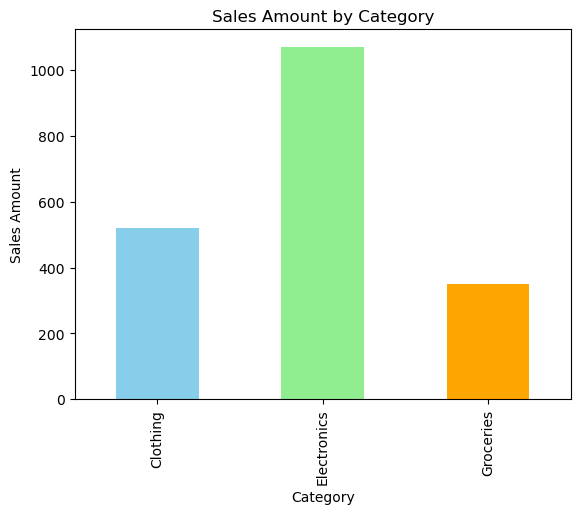

In [64]:
df.groupby('Category')['Sales Amount'].sum().plot(kind='bar', color=['skyblue', 'lightgreen', 'orange'])
plt.title('Sales Amount by Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.show()

2. **Line Chart Chart**

* Purpose: Showing trends over time (time series data).
* When to use:
    * To visualize how a continuous variable changes over time.
    * To track metrics like sales, stock prices, or temperature.

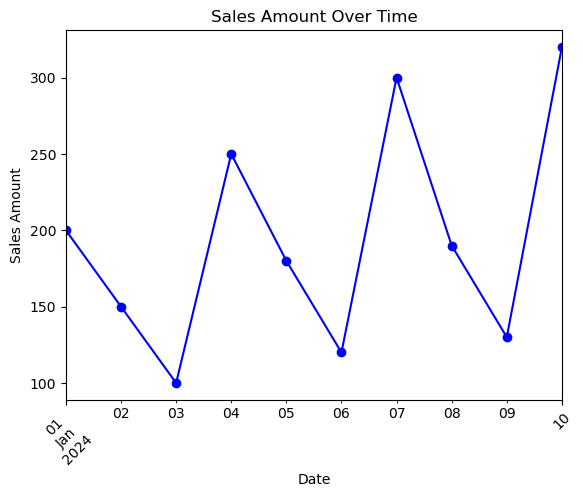

In [65]:
df.set_index('Date')['Sales Amount'].plot(kind='line', marker='o', color='b')
plt.title('Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

3. **Histogram**

* Purpose: Showing the distribution of a single continuous variable.
* When to use:
    * To understand the frequency distribution of numerical data.
    * When you need to see how data points are distributed across ranges (bins).

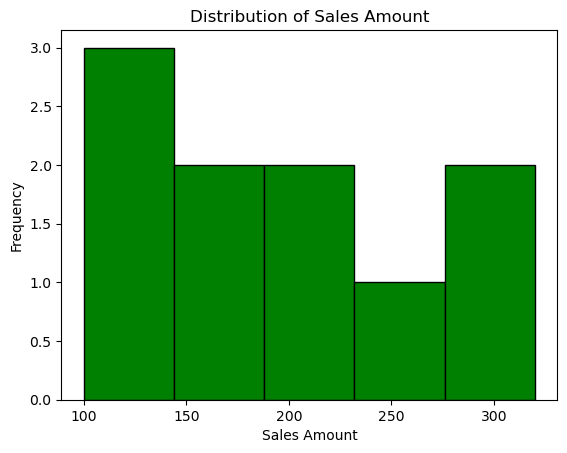

In [66]:
df['Sales Amount'].plot(kind='hist', bins=5, color='green', edgecolor='black')
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

4. **Scatter Plot**

* Purpose: Visualizing relationships between two continuous variables.
* When to use:
    * To check for correlations or relationships between two numerical variables (e.g., advertising spend vs. sales).
    * Helps in detecting outliers and patterns.

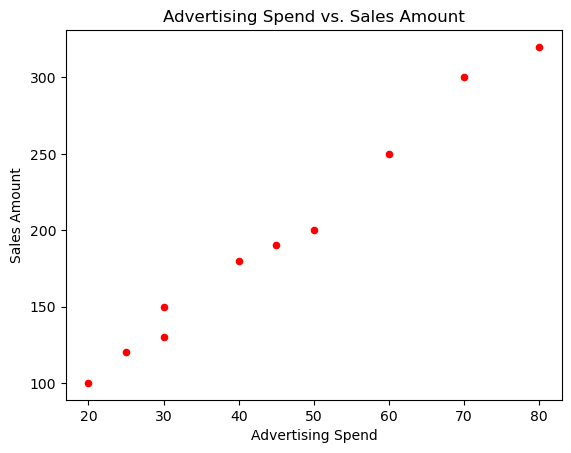

In [68]:
df.plot(kind='scatter', x='Advertising Spend', y='Sales Amount', color='red')
plt.title('Advertising Spend vs. Sales Amount')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales Amount')
plt.show()

5. **Box Plot**

* Purpose: Visualizing the distribution of data and identifying outliers.
* When to use:
    * To show the spread, median, and quartiles of a numerical variable.
    * To highlight outliers in the data.

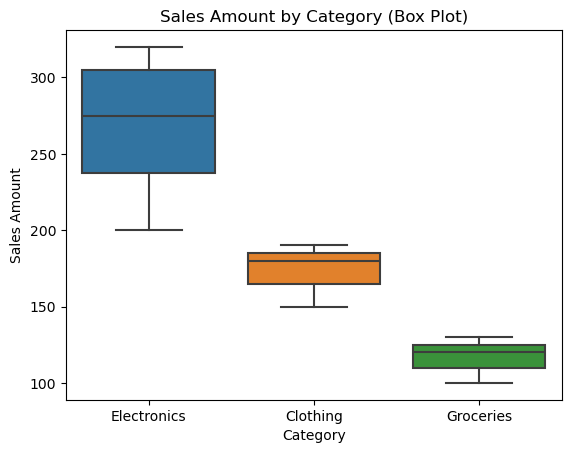

In [69]:
sns.boxplot(x='Category', y='Sales Amount', data=df)
plt.title('Sales Amount by Category (Box Plot)')
plt.show()

6. **Heatmap**

* Purpose: Visualizing the correlation between multiple variables or matrix-like data.
* When to use:
    * To examine relationships or patterns in a dataset with many variables (e.g., correlation matrix).
    * To show intensity of values across two dimensions.

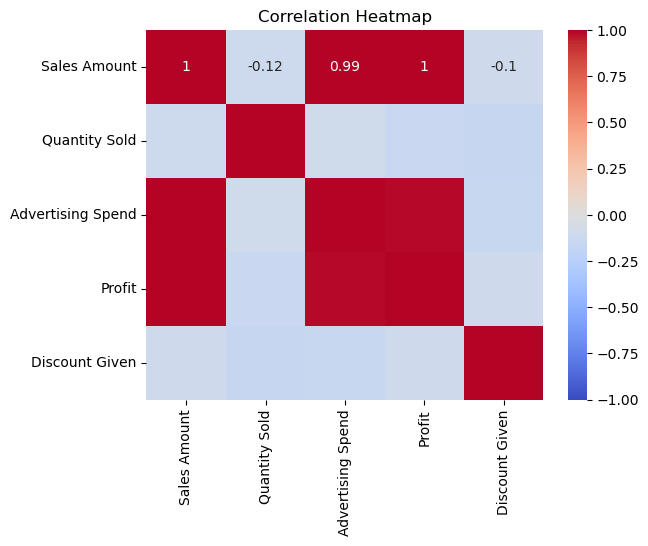

In [70]:
correlation_matrix = df[['Sales Amount', 'Quantity Sold', 'Advertising Spend', 'Profit', 'Discount Given']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()